/tmp/ipython-input-6-2972131402.py:138: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpu_labels = df.groupby("Throughput")["CPU Load"].agg(lambda x: x.value_counts().idxmax())
/tmp/ipython-input-6-2972131402.py:187: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  q3_max = df.groupby("Throughput")["Power"].quantile(0.75).max()


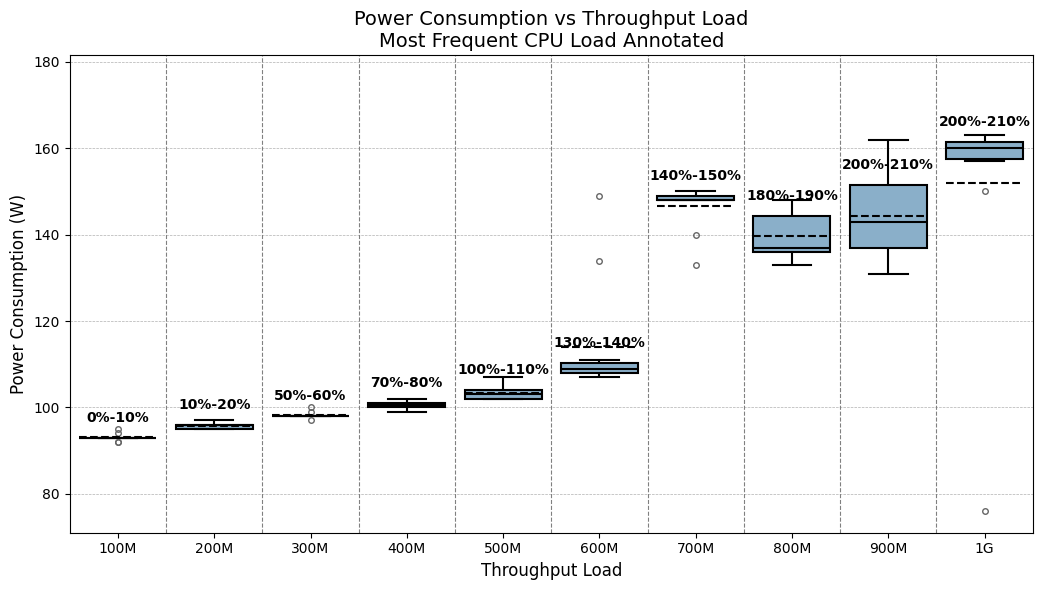

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO

# === Raw data ===
raw_input_data = """
93,[0%-10%]
93,[0%-10%]
93,[0%-10%]
93,[0%-10%]
93,[0%-10%]
93,[0%-10%]
93,[0%-10%]
93,[0%-10%]
93,[0%-10%]
92,[0%-10%]
94,[10%-20%]
92,[10%-20%]
95,[10%-20%]
97,[10%-20%]
96,[10%-20%]
95,[10%-20%]
95,[10%-20%]
96,[10%-20%]
95,[10%-20%]
96,[10%-20%]
95,[50%-60%]
96,[50%-60%]
96,[50%-60%]
95,[50%-60%]
97,[50%-60%]
98,[50%-60%]
97,[50%-60%]
98,[50%-60%]
98,[50%-60%]
98,[50%-60%]
98,[50%-60%]
98,[50%-60%]
98,[50%-60%]
99,[50%-60%]
98,[50%-60%]
98,[50%-60%]
100,[50%-60%]
101,[50%-60%]
100,[50%-60%]
101,[50%-60%]
101,[70%-80%]
100,[70%-80%]
100,[70%-80%]
100,[70%-80%]
101,[70%-80%]
100,[70%-80%]
101,[70%-80%]
99,[70%-80%]
102,[70%-80%]
102,[70%-80%]
103,[100%-110%]
104,[100%-110%]
102,[100%-110%]
102,[100%-110%]
103,[100%-110%]
104,[100%-110%]
103,[100%-110%]
103,[100%-110%]
102,[100%-110%]
104,[100%-110%]
107,[130%-140%]
107,[130%-140%]
107,[130%-140%]
108,[130%-140%]
108,[130%-140%]
111,[130%-140%]
109,[130%-140%]
110,[130%-140%]
108,[130%-140%]
109,[130%-140%]
109,[130%-140%]
134,[140%-150%]
149,[140%-150%]
140,[140%-150%]
148,[140%-150%]
148,[140%-150%]
149,[140%-150%]
148,[140%-150%]
149,[140%-150%]
149,[140%-150%]
148,[140%-150%]
148,[140%-150%]
150,[140%-150%]
133,[180%-190%]
149,[180%-190%]
148,[180%-190%]
136,[180%-190%]
136,[180%-190%]
139,[180%-190%]
137,[180%-190%]
136,[180%-190%]
143,[180%-190%]
137,[200%-210%]
135,[200%-210%]
133,[200%-210%]
148,[200%-210%]
148,[200%-210%]
137,[200%-210%]
148,[200%-210%]
142,[200%-210%]
144,[200%-210%]
140,[200%-210%]
151,[200%-210%]
153,[200%-210%]
131,[200%-210%]
137,[200%-210%]
133,[200%-210%]
155,[200%-210%]
162,[200%-210%]
158,[200%-210%]
157,[200%-210%]
160,[200%-210%]
161,[200%-210%]
162,[200%-210%]
163,[200%-210%]
161,[200%-210%]
160,[200%-210%]
163,[200%-210%]
150,[200%-210%]
76,[200%-210%]
"""

# === Data Preparation ===
df = pd.read_csv(StringIO(raw_input_data), names=["Power", "CPU Load"])
df["CPU Load"] = df["CPU Load"].str.strip("[]")

bin_labels = ["100M", "200M", "300M", "400M", "500M", "600M", "700M", "800M", "900M", "1G"]
bin_edges = np.linspace(0, len(df), num=11, dtype=int)
df["Throughput"] = pd.cut(df.index, bins=bin_edges, labels=bin_labels, include_lowest=True)
cpu_labels = df.groupby("Throughput")["CPU Load"].agg(lambda x: x.value_counts().idxmax())
uniform_color = sns.color_palette("Set3", len(bin_labels))[4]

# === Plotting ===
plt.figure(figsize=(11, 6))
sns.boxplot(
    x="Throughput",
    y="Power",
    data=df,
    color=uniform_color,
    linewidth=1.5,
    fliersize=4,
    meanline=True,
    showmeans=True,
    boxprops=dict(edgecolor='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='black'),
    meanprops=dict(color='black', linestyle='--', linewidth=1.5)
)

# Bin dividers
for i in range(1, len(bin_labels)):
    plt.axvline(i - 0.5, linestyle='--', color='gray', linewidth=0.8)

# X markers for data points
sns.stripplot(
    x="Throughput",
    y="Power",
    data=df,
    marker='x',
    size=8,
    color='black',
    alpha=0.8,
    jitter=False
)

# Step 1: Determine extended limit
whisker_max_list = []
for i in range(len(bin_labels)):
    box_data = df[df["Throughput"] == bin_labels[i]]["Power"]
    if not box_data.empty:
        q3 = box_data.quantile(0.75)
        q1 = box_data.quantile(0.25)
        iqr = q3 - q1
        whisker_max = q3 + 1.5 * iqr
        whisker_max_list.append(whisker_max)

# Extend y-limits for margin
q3_max = df.groupby("Throughput")["Power"].quantile(0.75).max()
plt.ylim(df["Power"].min() - 5, q3_max + 20)

# Place label above Q3 (box top), not whisker
for i, label in enumerate(cpu_labels):
    box_data = df[df["Throughput"] == bin_labels[i]]["Power"]
    if not box_data.empty:
        y_q3 = box_data.quantile(0.75)
        y_label = y_q3 + 3  # 3W above the box
        plt.text(i, y_label, label, ha='center', va='bottom', fontsize=10, fontweight='bold')


# Final settings
plt.title("Power Consumption vs Throughput Load\nMost Frequent CPU Load Annotated", fontsize=14)
plt.xlabel("Throughput Load", fontsize=12)
plt.ylabel("Power Consumption (W)", fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout(rect=[0.01, 0, 0.97, 1])
plt.savefig("power_vs_throughput_updated.png")
plt.show()
